# 8장 고급 통계

- 점 추정치
- 신뢰 구간
- 중심 극한 정리
- 가설 검정

점 추정치^point estimate^는 표본 데이터를 기반으로 한 모집단 모수의 추정치다

`푸아송 분포`^Poisson\ distribution^ 라고 알려진 확률 분포를 사용해 질문에 대한 9000개의 답변을 무작위로 생성한다.

보통 하루에 몇 분 정도 휴식을 취하는가? 이것은 '모집단'을 나타낸다.

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats

np.random.seed(1234)
# 약 60분간 휴식을 취하는 3000명의 사람들을 나타낸다.
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
long_breaks

array([62, 69, 77, ..., 68, 73, 74])

In [5]:
?stats.poisson.rvs

Signature: stats.poisson.rvs(*args, **kwargs)
Docstring:
Random variates of given type.

Parameters
----------
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).
size : int or tuple of ints, optional
    Defining number of random variates (Default is 1).  Note that `size`
    has to be given as keyword, not as positional argument.
random_state : None or int or ``np.random.RandomState`` instance, optional
    If int or RandomState, use it for drawing the random variates.
    If None, rely on ``self.random_state``.
    Default is None.

Returns
-------
rvs : ndarray or scalar
    Random variates of given `size`.
File:      /usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


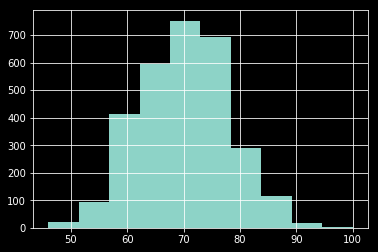

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# https://matplotlib.org/gallery/style_sheets/dark_background.html

pd.Series(long_breaks).hist()

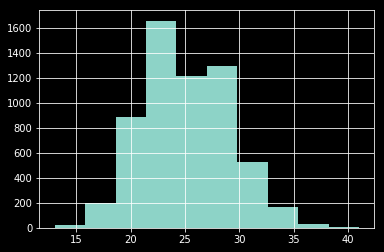

In [11]:
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
# 약 15분간 휴식을 취하는 6000명의 사람들을 나타낸다.
pd.Series(short_breaks).hist()

In [13]:
breaks = np.concatenate((long_breaks, short_breaks))
# 두 개의 배열을 합쳐서 9000명으로 구성된 '모집단'을 얻는다.
breaks

array([62, 69, 77, ..., 30, 21, 29])

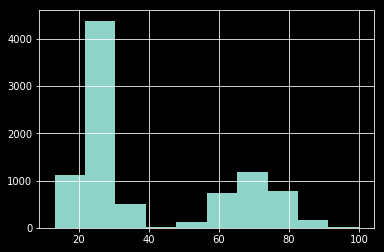

In [14]:
pd.Series(breaks).hist()

In [15]:
breaks.mean()
# 39.99 분이 모수다.

39.999444444444443

In [25]:
sample_breaks = np.random.choice(a = breaks, size=100)
# 직원 100명의 표본 추출
sample_breaks.mean()

37.960000000000001

In [17]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
-----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
--------
samples : single item or ndarray
    The generated random samples

Raises
-------
ValueError
    If a is an int and less than zero, if a or p are not 1-dimensional,
    if a is an array-like of siz

In [18]:
sample_breaks

array([24, 27, 31, 62, 25, 20, 31, 74, 22, 20, 33, 26, 25, 75, 26, 23, 80,
       32, 27, 23, 22, 22, 24, 20, 56, 24, 75, 27, 57, 24, 29, 35, 68, 20,
       73, 72, 23, 24, 23, 27, 22, 25, 28, 75, 24, 68, 16, 29, 29, 29, 25,
       76, 26, 23, 27, 27, 20, 84, 61, 29, 94, 91, 28, 31, 27, 33, 28, 74,
       71, 30, 18, 27, 25, 26, 33, 71, 80, 59, 25, 65, 22, 20, 27, 23, 26,
       22, 62, 27, 33, 28, 64, 19, 68, 25, 28, 60, 21, 73, 80, 72])

In [27]:
breaks.mean() - sample_breaks.mean()
# 평균과의 차이는 2.04분, 나쁘지 않다.! (랜덤이므로 할떄마다 변경된다.)

2.0394444444444417

In [30]:
employee_races = (["white"]*2000) + (["black"]*1000) +\
                   (["hispanic"]*1000) + (["asian"]*3000) +\
                   (["other"]*3000)

In [32]:
import random

demo_sample = random.sample(employee_races, 1000) # 표본 값 1000

for race in set(demo_sample):
    print( race + ' proportion estimate:')
    print( demo_sample.count(race)/1000.)

asian proportion estimate:
0.316
other proportion estimate:
0.282
white proportion estimate:
0.219
black proportion estimate:
0.091
hispanic proportion estimate:
0.092


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1090dccf8>]], dtype=object)

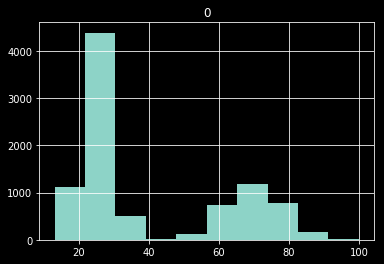

In [34]:
pd.DataFrame(breaks).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109049630>]], dtype=object)

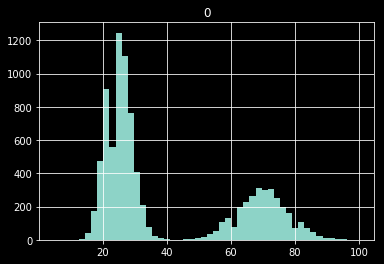

In [33]:
pd.DataFrame(breaks).hist(bins=50, range=(5, 100))

데이터가 일반적으로 정규 분포를 따르지 않고 `이중 모드`bi-modal 인 것처럼 보인다.

즉, 약 25분과 70분의 휴식 시간에 두 번의 피크가 있음을 의미한다.

우선 동일한 크기로 여러 표본의 점 추정치 분포인 표본 분포를 활용해야 한다.

표본 분포를 만드는 절차는 다음과 같다.

1. 휴식 시간의 크기가 100인 서로 다른 표본 500개를 가져온다.
2. 500개의 서로 다른 점 추정치에 대한 막대그래프를 만든다.(분포를 드러냄)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a4edf60>]], dtype=object)

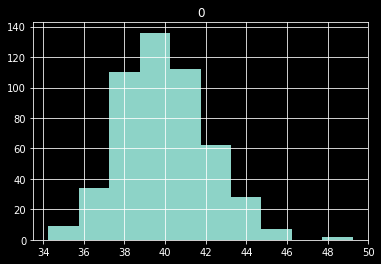

In [35]:
point_estimates = []

for x in range(500):
    sample = np.random.choice(a=breaks, size=100)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).hist()

이 데이터는 `중심 극한 정리`central limit theorem 라고 불리는 이유로 인해 정규 분포로 수렴된다.

이것은 취하는 표본 수를 늘릴 때 표본 분포(점 추정치의 분포)가 정규 분포에 접근한다는 의미다.

In [36]:
breaks.mean() - np.array(point_estimates).mean()

0.036684444444439634

## 신뢰 구간

점 추정치는 모집단 모수에 대한 추정치며, 표본 분포는 훨씬 우수하지만 이러한 접근법에서는 다음과 같은 두 가지 주요 문제가 있다.

- 단일 점 추정치는 오류가 발생하기 쉽다.(무무엇보다도 표본 추출 편향 때문이다.)
- 표본 분포를 위해 특정 크기의 여러 표본을 취하는 것은 실행 불가능할 수 있으며, 때로는 실제 모집단 모수를 찾는 것보다 훨씬 더 실핼 불가능할 수 있다.

`신뢰 구간`confidence interval 은 일부 신뢰 수준에서 실제 모집단의 모수를 포함하는 점 추정치에 기반을 둔 값의 범위다.

`신뢰도`Confidence 는 고급 통계에서 중요한 개념이다. 얻은 답이 정확할 빈도를 나타낸다.

예를 들어 단일 점 추정치만 사용해 실제 모집단 모수를 담을 확률이 95%가 되려면 신뢰 수준을 95%로 설정해야 한다.

> 더 확실히 하기 위해서 신뢰 수준이 높을수록 신뢰 구간이 넓어지고 커진다.

신뢰 구간을 위해 다음과 같은 것이 필요하다.

- 점 추정치로, 이를 위해 앞의 예제에서 휴식 길이의 표본 평균을 취한다.
- 데이터의 분산을 나타내는 모집단 표준 편차의 추정치다.
  - 이것은 표본 표준 편차(표본 데이터의 표준 편차)를 취하고 그 수를 모집단 크기의 제곱근으로 나눠서 계산한다.
- 자유도(표본 크기 -1)다.

In [39]:
?stats.t.interval

Signature: stats.t.interval(alpha, *args, **kwds)
Docstring:
Confidence interval with equal areas around the median.

Parameters
----------
alpha : array_like of float
    Probability that an rv will be drawn from the returned range.
    Each value should be in the range [0, 1].
arg1, arg2, ... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    location parameter, Default is 0.
scale : array_like, optional
    scale parameter, Default is 1.

Returns
-------
a, b : ndarray of float
    end-points of range that contain ``100 * alpha %`` of the rv's
    possible values.
File:      /usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [38]:
import math

sample_size = 100 # 채취할 표본의 크기
sample = np.random.choice(a=breaks, size=sample_size) # 이전에 휴식 모집단 9000개에서 채취한 sample_size의 표본
sample_mean = sample.mean() # 휴식 길이 표본의 표본 평균
sample_stdev = sample.std() # 표본 표준 편차
sigma = sample_stdev/math.sqrt(sample_size) # 모집단 표준 편차 추정치

stats.t.interval(alpha=0.95,
                df=sample_size-1,
                loc=sample_mean,
                scale=sigma)


(39.307801755890651, 48.192198244109349)

범위 39.30 에서 48.19까지는 95% 신뢰도로 평균 휴식 시간에 대한 신뢰 구간을 나타낸다.

In [40]:
# 신뢰 구간을 만드는 함수
def make_confidence_interval():
    sample_size = 100
    sample = np.random.choice(a=breaks, size=sample_size)
    sample_mean = sample.mean() # 휴식 길이 표본의 표본 평균
    sample_stdev = sample.std() # 표본 표준 편차
    sigma = sample_stdev/math.sqrt(sample_size) # 모집단 표준 편차 추정치

    return stats.t.interval(alpha=0.95,
                            df=sample_size-1,
                            loc=sample_mean,
                            scale=sigma)

단일 신뢰 구간에 실제 모집단 모수 39.99가 포함될 확률을 검정하는 프로시저를 만든다.

In [41]:
times_in_interval = 0
for i in range(10000):
    interval = make_confidence_interval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
        times_in_interval += 1
        
print(times_in_interval/10000)

0.9472


## 가설 검정

`가설 검정`hypothesis test은 데이터 표본으로 전체 모집단에 대해 특정 조건이 참이라고 가정할 수 있는지 여부를 확인하는 데 사용되는 통계적 검정이다.

기본적으로 가설 검정은 전체 모집단에 대해 갖고 있는 가설에 대한 검정이다.

가설 검정은 일반적으로 모집단에 관한 두 가지 반대 가설을 조사한다.

- 귀무 가설 null hypothesis
- 대립 가설 alternative hypothesis

귀무가설은 검정되는 문장이며 기본 정답이다. 이것은 출발점이자 원래의 가설이다.

대립가설은 귀무가설에 반대하는 진술이다.




### 가설 검정 실행

대부분의 가설 검정이 따르는 다섯 가지 기본 단계

1. 가설을 지정한다.
2. 검정 표본의 표본 크기를 결정한다.
3. 유의 수준(일반적으로 알파 또는 $\alpha$라고 함)을 선택한다.
4. 데이터를 수집한다.
5. 귀무가설을 기각할 것인지 채택할 것인지 결정한다.

다음 세 가지 유형의 가설 검정을 살펴본다.

- 단일 표본 t-테스트
- 카이 제곱 Chi-square 적합성
- 연관성/독립성에 대한 카이 제곱 검정